<a href="https://colab.research.google.com/github/tharun8571/tharuntensor/blob/main/tf_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from keras import layers, models, datasets

In [ ]:

(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

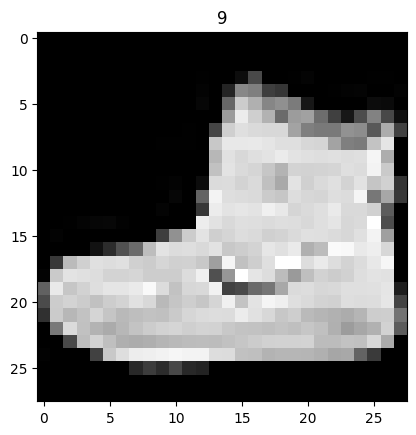

In [ ]:
plt.imshow(x_train[0],cmap='gray')
plt.title(y_train[0])
plt.show()

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

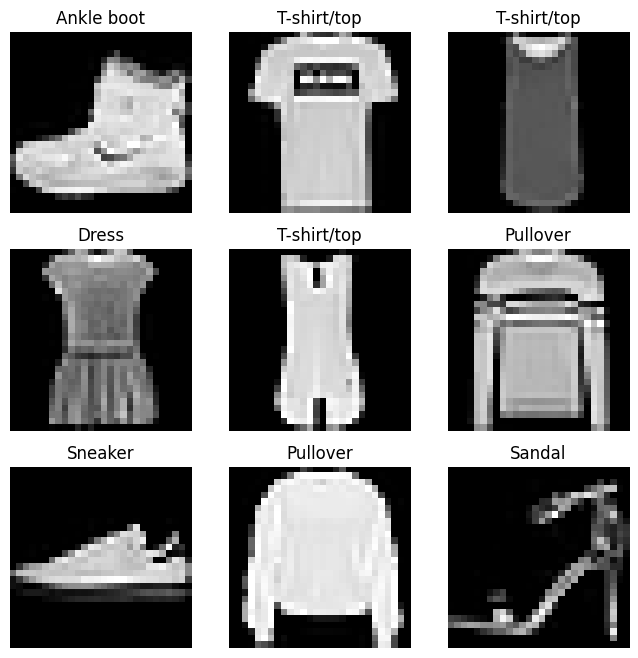

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [ ]:
model=keras.Sequential([
layers.Flatten(input_shape=(28,28)),
layers.Dense(124, activation="relu"),
layers.Dense(124, activation="relu"),
layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7737 - loss: 0.8014 - val_accuracy: 0.8043 - val_loss: 0.6596
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7967 - loss: 0.6175 - val_accuracy: 0.7925 - val_loss: 0.6402
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8141 - loss: 0.5436 - val_accuracy: 0.8148 - val_loss: 0.5097


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8167 - loss: 0.5198
Test accuracy: 0.8120999932289124


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


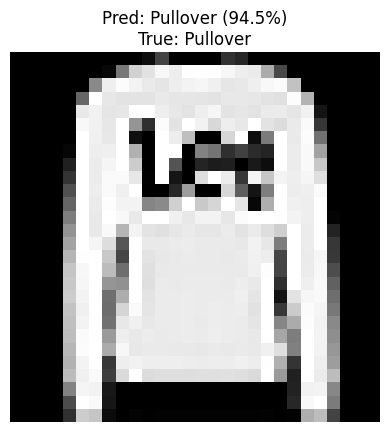

In [ ]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
i = 1
pred = predictions[i]
pred_label = np.argmax(pred)
true_label = y_test[i]

plt.imshow(x_test[i], cmap='gray')
plt.title(f"Pred: {class_names[pred_label]} ({100*pred[pred_label]:.1f}%)\nTrue: {class_names[true_label]}")
plt.axis('off')
plt.show()

In [ ]:
test_sample = [
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,4,7,7,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,18,86,148,160,160,150,108,6,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,13,121,202,255,255,255,255,220,94,3,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,41,179,255,255,255,255,255,255,215,38,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,4,130,255,255,255,255,255,255,255,255,121,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,53,233,255,255,255,255,255,255,255,255,189,2,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,3,133,255,255,255,255,255,255,255,255,255,245,35,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,42,215,255,255,255,255,255,255,255,255,255,255,106,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,82,255,255,255,255,255,255,255,255,255,255,255,148,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,117,255,255,255,255,255,255,255,255,255,255,255,178,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,144,255,255,255,255,255,255,255,255,255,255,255,196,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,155,255,255,255,255,255,255,255,255,255,255,255,207,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,162,255,255,255,255,255,255,255,255,255,255,255,218,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,167,255,255,255,255,255,255,255,255,255,255,255,233,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,168,255,255,255,255,255,255,255,255,255,255,255,250,10,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,157,255,255,255,255,255,255,255,255,255,255,255,255,77,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,131,255,255,255,255,255,255,255,255,255,255,255,255,141,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,96,255,255,255,255,255,255,255,255,255,255,255,255,191,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,55,255,255,255,255,255,255,255,255,255,255,255,255,221,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,12,241,255,255,255,255,255,255,255,255,255,255,255,238,5,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,205,255,255,255,255,255,255,255,255,255,255,255,249,30,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,148,255,255,255,255,255,255,255,255,255,255,255,255,60,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,89,255,255,255,255,255,255,255,255,255,255,255,255,81,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,29,243,255,255,255,255,255,255,255,255,255,255,255,86,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,3,167,255,255,255,255,255,255,255,255,255,255,255,74,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,63,215,255,255,255,255,255,255,255,255,255,255,47,0,0,0,0,0,0,0,0]
]

In [ ]:
sv=np.array(test_sample)
sv=sv.reshape(1,28,28)/255.0
prediction=probability_model.predict(sv)
print("Predicted class:", class_names[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class: Shirt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving nG8Kj.jpg to nG8Kj.jpg


In [ ]:
import numpy as np
from PIL import Image

img = Image.open(list(uploaded.keys())[0])
img = img.convert('L')
img = img.resize((28, 28))
img_array = np.array(img)
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28)

In [ ]:
prediction = probability_model.predict(img_array)
print("Predicted class:", class_names[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Sandal
